In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
dfs= pd.read_html(url, match='.+', header=0, flavor='bs4')
dfs

[    Postcode           Borough  \
 0        M1A      Not assigned   
 1        M2A      Not assigned   
 2        M3A        North York   
 3        M4A        North York   
 4        M5A  Downtown Toronto   
 5        M5A  Downtown Toronto   
 6        M6A        North York   
 7        M6A        North York   
 8        M7A      Queen's Park   
 9        M8A      Not assigned   
 10       M9A         Etobicoke   
 11       M1B       Scarborough   
 12       M1B       Scarborough   
 13       M2B      Not assigned   
 14       M3B        North York   
 15       M4B         East York   
 16       M4B         East York   
 17       M5B  Downtown Toronto   
 18       M5B  Downtown Toronto   
 19       M6B        North York   
 20       M7B      Not assigned   
 21       M8B      Not assigned   
 22       M9B         Etobicoke   
 23       M9B         Etobicoke   
 24       M9B         Etobicoke   
 25       M9B         Etobicoke   
 26       M9B         Etobicoke   
 27       M1C       

In [4]:
dfs[0].columns = ['Postal Code', 'Borough', 'Neighborhood']
df=dfs[0]
df.sort_values(by=['Postal Code'])

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
12,M1B,Scarborough,Malvern
11,M1B,Scarborough,Rouge
29,M1C,Scarborough,Port Union
28,M1C,Scarborough,Rouge Hill
27,M1C,Scarborough,Highland Creek
44,M1E,Scarborough,West Hill
43,M1E,Scarborough,Morningside
42,M1E,Scarborough,Guildwood
53,M1G,Scarborough,Woburn


In [5]:
mask = df['Borough'].isin(['Not assigned'])
df_drop=df[~mask]
df_drop[0:5]

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [6]:
df_group=df_drop.groupby(['Postal Code','Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_group[0:5]

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [7]:
df_group.shape

(103, 3)

In [8]:
geodata = pd.read_csv('https://cocl.us/Geospatial_data')
geodata_sorted=geodata.sort_values(by=['Postal Code'])
geodata_sorted[0:5]

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
df_ll=df_group.merge(geodata_sorted)
df_ll[0:5]

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Selecting only boroughs that contain the word "Toronto":

In [10]:
df_toronto=df_ll.set_index('Borough').filter(like='Toronto', axis=0)
df_toronto[0:5]

,Postal Code,Neighborhood,Latitude,Longitude
Borough,,,,
East Toronto,M4E,The Beaches,43.676357,-79.293031
East Toronto,M4K,"The Danforth West, Riverdale",43.679557,-79.352188
East Toronto,M4L,"The Beaches West, India Bazaar",43.668999,-79.315572
East Toronto,M4M,Studio District,43.659526,-79.340923
Central Toronto,M4N,Lawrence Park,43.728020,-79.388790


In [11]:
df_c = df_toronto.drop(['Neighborhood'], axis=1)
df_c[0:5]

,Postal Code,Latitude,Longitude
Borough,,,
East Toronto,M4E,43.676357,-79.293031
East Toronto,M4K,43.679557,-79.352188
East Toronto,M4L,43.668999,-79.315572
East Toronto,M4M,43.659526,-79.340923
Central Toronto,M4N,43.728020,-79.388790


In [12]:
df_c.shape

(38, 3)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

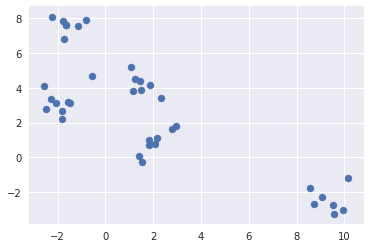

In [14]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=38, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

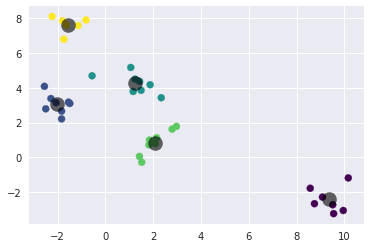

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6);

In [17]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


In [18]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge


In [19]:
locations = df_c[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[43.7043244, -79.3887901]

In [20]:
map = folium.Map(location=[43.70, -79.39], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_c['Postal Code'][point]).add_to(map)
map